### Early Stopping

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Scale values ranging from 0-255 to 0-1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
base_model = keras.models.Sequential()
base_model.add(keras.layers.Flatten(input_shape=[28, 28]))
base_model.add(keras.layers.Dense(300, activation="relu"))
base_model.add(keras.layers.Dense(10, activation="softmax"))

base_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
early_stopped_model = keras.models.Sequential()
early_stopped_model.add(keras.layers.Flatten(input_shape=[28, 28]))
early_stopped_model.add(keras.layers.Dense(300, activation="relu"))
early_stopped_model.add(keras.layers.Dense(10, activation="softmax"))

early_stopped_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

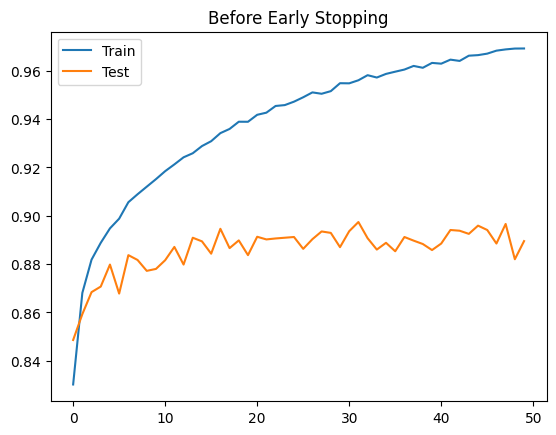

In [7]:
history = base_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), verbose=0)

plt.title("Before Early Stopping")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0778 - accuracy: 0.9709 - val_loss: 0.5756 - val_accuracy: 0.8916
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0739 - accuracy: 0.9729 - val_loss: 0.6455 - val_accuracy: 0.8863
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705 - accuracy: 0.9738 - val_loss: 0.5933 - val_accuracy: 0.8898
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0732 - accuracy: 0.9722 - val_loss: 0.5930 - val_accuracy: 0.8925
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9728 - val_loss: 0.6146 - val_accuracy: 0.8953


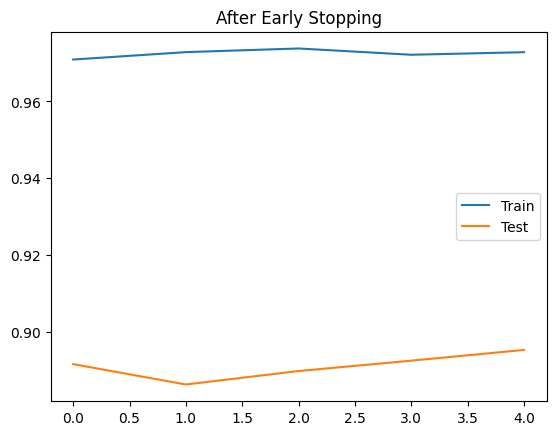

In [9]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history = early_stopped_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[callback])

plt.title("After Early Stopping")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()